# **Introduction** 

I will be performing exploratory data analysis on this dataset. This dataset was obtained from a study conducted from 1958 to 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

### Objective of this project 
- To find out any correlation between survival rate and age
- Did the cancer patients have better survival chance as the year progresses?
- Did the number of positive axillary nodes affect survival rates?

First, let's import required packages 

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os # accessing directory structure
import matplotlib.pyplot as plt # plotting
import seaborn as sns

Next, we will import the csv file comprising Haberman Cancer Survival Dataset

In [3]:
haberman = pd.read_csv('../input/haberman.csv/haberman.csv')

Get a quick view on the first 5 rows of dataset.

In [4]:
haberman.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


Check to see if there is any unknown values i.e. NaN, NULL, etc for each column.

In [5]:
haberman.isnull().sum()

age       0
year      0
nodes     0
status    0
dtype: int64

Change values in status: 1 to survived and 2 to dead for better readability. Achived through [pandas.dataframe.replace()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html)

In [6]:
haberman['status'] = haberman.status.replace([1,2], ['survived','dead'])

## Probability Density Function (PDF)
PDF describes the relative likelihood for a random variable to take on a given value. Here, PDF is a great way for us to see the proportion of datapoints in each variable. For instance, we will like to see the proportion of people's age in a dataset that survived Haberman cancer. Does age has an effect on survival chance? Let's see!

First, we have an overview of the dataset using [pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html).

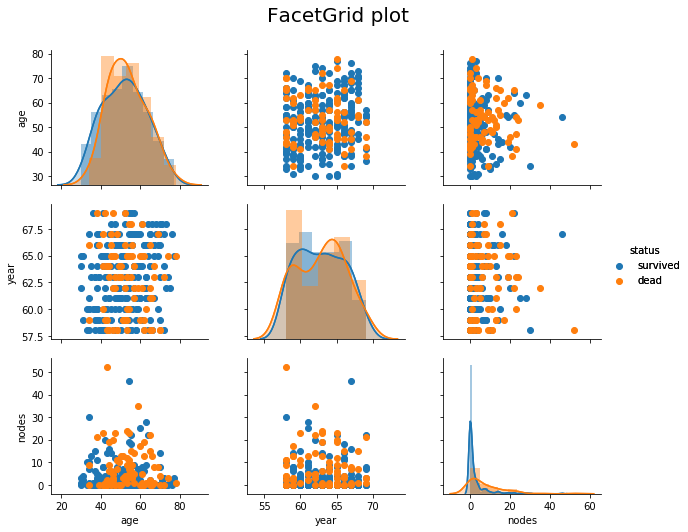

In [7]:
g = sns.pairplot(haberman, hue = 'status')
g.map_diag(sns.distplot)
g.map_offdiag(plt.scatter)
g.add_legend()
g.fig.suptitle('FacetGrid plot', fontsize = 20)
g.fig.subplots_adjust(top=0.9);

## **Summary from diagram**
### What we can see from here:
- We will just need to look into the histograms for each variable that are linked to survival rates (age, nodes and year).
- For age, we observed people from the age of 30 to 40 has better survival rates. People from the age of 50 to 60 had a lower chance of survival while those above 60 has an equal chance.
- For year, we only observed higher survival rate between 1960 to 1963. Well, this does not tell us anything since there could changes in how data are collected or there are simply less haberman cancer patients admitted into the University of Chicago's Billings Hospital. 
- For nodes, we see a better survival rates with patients that have 2 or less positive axillary nodes. 

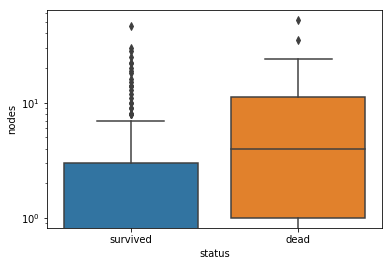

In [8]:
gg = sns.boxplot(x='status',y='nodes', data=haberman)
gg.set_yscale('log')

## Boxplot

Boxplot is also a great way to represent the distribution of qualitative data. What we see here is that people who survived have a range of 0-7 nodes, while those that died have 0-25 nodes. 

# Finding correlation between age and survival rate 
- I will use [Pandas dataframe.corr()](https://www.geeksforgeeks.org/python-pandas-dataframe-corr/) for this purpose

## Correlation between age and survivial rate

In [9]:
age_corr = haberman
age_corr_dead = age_corr[age_corr['status'] == 'dead'].groupby(['age']).size().reset_index(name='count')
age_corr_dead.corr()

,age,count
age,1.000000,-0.280707
count,-0.280707,1.000000


Text(0.5, 1.0, 'Age vs Death count')

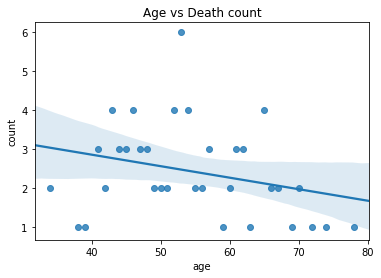

In [10]:
sns.regplot(x = 'age', y = 'count', data = age_corr_dead).set_title("Age vs Death count")

In [11]:
age_corr_survived = age_corr[age_corr['status'] == 'survived'].groupby(['age']).size().reset_index(name='count')
age_corr_survived.corr()

,age,count
age,1.000000,-0.266055
count,-0.266055,1.000000


Text(0.5, 1.0, 'Age vs Survived count')

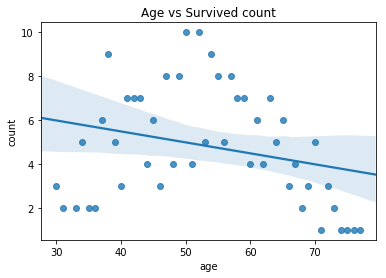

In [12]:
sns.regplot(x = 'age', y = 'count', data = age_corr_survived).set_title('Age vs Survived count')

For correlation coefficient, a positive 1 means a perfect positive correlation, which means both variables move in the same direction. If one goes up, the other will go up. In contrary, a negative 1 means the relationship that exists between two variables is negative 100% of the time. 
- For this study, we observed a weak negative correlation between age and survived and age and death. We see a negative correlation coefficient of approximately -0.281 when comparing age with number of patients that survived. Looking into the square of the correlation coefficient, R-squared, which represents the degree or extent to which the variance of one variable is related to the variance of the second variable, and is typically expressed in percentage terms, we observed a value of approximately 0.0790. This value shows that 7.9% of the variation in survived counts can be explained by age. A value of approximately 7% is observed when comparing death count and age.
- Hence, we can say that age has no correlation with survivial rates.


## Correlation between year and survival rate

In [13]:
year_corr = haberman
year_corr_dead = year_corr[year_corr['status'] == 'dead'].groupby(['year']).size().reset_index(name='count')
year_corr_dead.corr()

,year,count
year,1.000000,-0.379363
count,-0.379363,1.000000


Text(0.5, 1.0, 'Year vs death count')

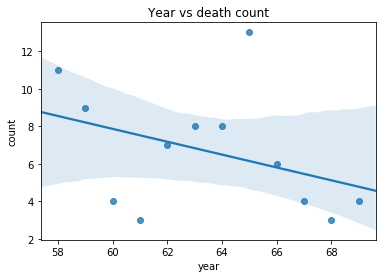

In [14]:
sns.regplot(x = 'year', y = 'count', data = year_corr_dead).set_title('Year vs death count')

In [15]:
year_corr_survived = year_corr[year_corr['status'] == 'survived'].groupby(['year']).size().reset_index(name='count')
year_corr_survived.corr()

,year,count
year,1.000000,-0.637572
count,-0.637572,1.000000


Text(0.5, 1.0, 'Year vs Survived count')

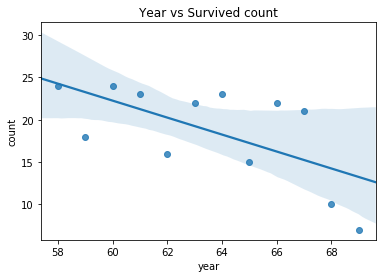

In [16]:
sns.regplot(x = 'year', y = 'count', data = year_corr_survived).set_title('Year vs Survived count')

As we compare year with survivial rates, we observed negative correlation once again, similar to what was seen when compared to age. R-squared values of 0.144 and 0.406 were observed for death and survived counts. This means that 14% of the variation in death counts were related to the year while approximately 41% of the variation in survived count were related to year.
- As compared to year, we see higher negative correlation values. Is this something that we can rely on? Well, we do observed more data points when comparing age with survival rate and the low amount of data point here could explain a higher negative correlation value.

## Correlation between positive axillary nodes and survival rates 


In [17]:
node_corr = haberman
node_corr_dead = node_corr[node_corr['status'] == 'dead'].groupby(['nodes']).size().reset_index(name = 'count')
node_corr_dead.corr()

,nodes,count
nodes,1.000000,-0.497861
count,-0.497861,1.000000


Text(0.5, 1.0, 'No of positive axillary nodes vs Death count')

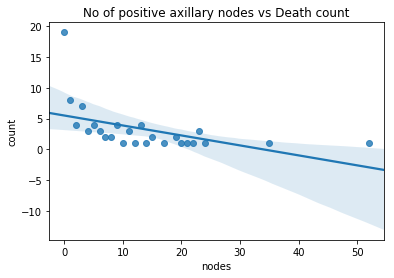

In [18]:
sns.regplot(x = 'nodes', y = 'count', data = node_corr_dead).set_title('No of positive axillary nodes vs Death count')

In [19]:
node_corr_survived = node_corr[node_corr['status'] == 'survived'].groupby(['nodes']).size().reset_index(name ='count')
node_corr_survived.corr()

,nodes,count
nodes,1.000000,-0.406837
count,-0.406837,1.000000


Text(0.5, 1.0, 'No of positive axillary nodes vs Survived patients')

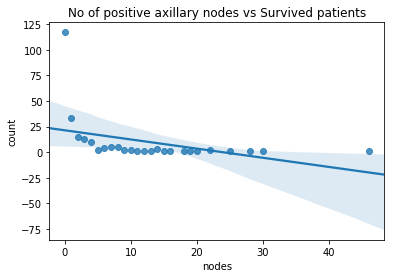

In [23]:
sns.regplot(x = 'nodes', y = 'count', data =node_corr_survived).set_title('No of positive axillary nodes vs Survived patients')

Like age and year, we observed negative correlation here as well. 25% of the variation in death counts were related to the number of positive axillary nodes while approximately 17% of the variation in survived count were related to positive axillary nodes.

# Conclusion 
- We observed weak negative correlation between age and survival rates.
- We observed weak negative correlation between year and survival rates. Although we do see significant correlation between year and survival rate, we presume that could be due to the lack of data points. 
- We observed weak negative correlation between nodes and survival rates. Although our figures have shown that survival chance has significantly improved in patients with low numbe rof positive axillary nodes, we will need more data to justify this claim. 